# DOMAIN: Social media analytics

# PROJECT OBJECTIVE: 

**Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Create\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Loading the JSON file**

In [3]:
social_media = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)

In [4]:
social_media.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
social_media.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_sarcastic,28619.0,0.476397,0.499451,0.0,0.0,0.0,1.0,1.0


In [6]:
social_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


**Inference** - is sarcastic is binary column with 0 and 1 and in article link we have articles link. 

**Retain relevant columns**

Creating a new with source of the article

In [7]:
social_media['article_source'] = social_media['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])

In [8]:
social_media.head(10)

,is_sarcastic,headline,article_link,article_source
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...,huffingtonpost
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...,huffingtonpost
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...,theonion
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...,theonion
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...,huffingtonpost


Removing the article link column as it is no longer required

In [9]:
social_media.drop(['article_link'], axis=1, inplace=True)

In [10]:
social_media.head(10)

,is_sarcastic,headline,article_source
0,1,thirtysomething scientists unveil doomsday clo...,theonion
1,0,dem rep. totally nails why congress is falling...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,huffingtonpost
3,1,inclement weather prevents liar from getting t...,theonion
4,1,mother comes pretty close to using word 'strea...,theonion
5,0,my white inheritance,huffingtonpost
6,0,5 ways to file your taxes with less stress,huffingtonpost
7,1,richard branson's global-warming donation near...,theonion
8,1,shadow government getting too large to meet in...,theonion
9,0,lots of parents know this scenario,huffingtonpost


**Get length of each sentence**

In [11]:
def length(headline):
  return len(headline.split())

In [12]:
social_media['Length'] = social_media['headline'].apply(length)

In [13]:
social_media.head(10)

,is_sarcastic,headline,article_source,Length
0,1,thirtysomething scientists unveil doomsday clo...,theonion,8
1,0,dem rep. totally nails why congress is falling...,huffingtonpost,13
2,0,eat your veggies: 9 deliciously different recipes,huffingtonpost,7
3,1,inclement weather prevents liar from getting t...,theonion,8
4,1,mother comes pretty close to using word 'strea...,theonion,9
5,0,my white inheritance,huffingtonpost,3
6,0,5 ways to file your taxes with less stress,huffingtonpost,9
7,1,richard branson's global-warming donation near...,theonion,13
8,1,shadow government getting too large to meet in...,theonion,12
9,0,lots of parents know this scenario,huffingtonpost,6


**Preprocessing the data**

In [14]:
stop = stopwords.words('english') #, x, flags=re.I

In [15]:
def cleaning(headline):
    headline = re.sub(r'\B#\S+','', headline)
    headline = re.sub(r"http\S+", "", headline)
    headline = ' '.join(re.findall(r'\w+', headline))
    headline = re.sub('@[^\s]+','', headline)
    headline = re.sub(r'\s+', ' ', headline)
    headline = re.sub(r'\s+[a-zA-Z]\s+', '', headline)
    headline = ' '.join(word for word in headline.split(' ') if word not in stop)
    
    return headline

In [16]:
social_media['cleaned_headline'] = social_media['headline'].apply(cleaning)

In [17]:
social_media.head(10)

,is_sarcastic,headline,article_source,Length,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...,theonion,8,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,huffingtonpost,13,dem rep totally nails congress falling short g...
2,0,eat your veggies: 9 deliciously different recipes,huffingtonpost,7,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,theonion,8,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,theonion,9,mother comes pretty close using word streaming...
5,0,my white inheritance,huffingtonpost,3,white inheritance
6,0,5 ways to file your taxes with less stress,huffingtonpost,9,5 ways file taxes less stress
7,1,richard branson's global-warming donation near...,theonion,13,richard bransonglobal warming donation nearly ...
8,1,shadow government getting too large to meet in...,theonion,12,shadow government getting large meet marriott ...
9,0,lots of parents know this scenario,huffingtonpost,6,lots parents know scenario


**Visual analysis**

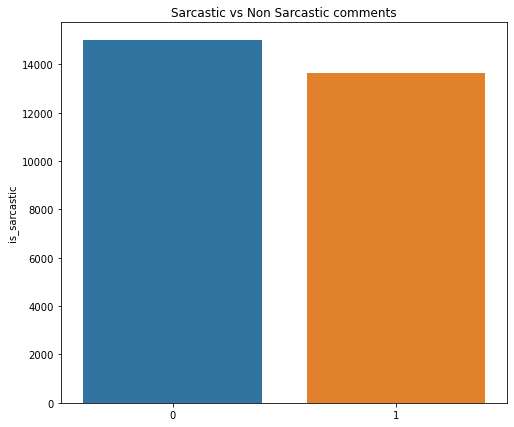

In [82]:
sarcas = social_media['is_sarcastic'].value_counts()

plt.figure(figsize = (8,7))
sns.barplot(y=sarcas,x=sarcas.index)
plt.title('Sarcastic vs Non Sarcastic comments')
plt.imshow;

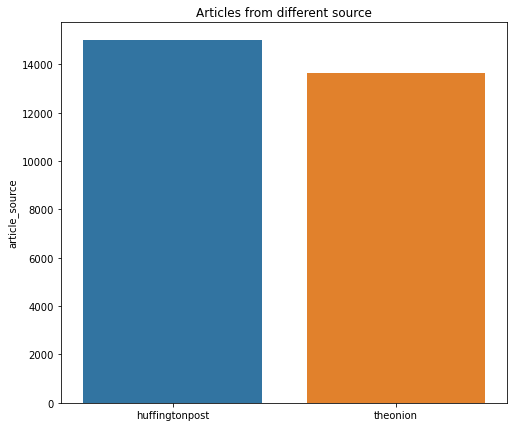

In [83]:
source = social_media['article_source'].value_counts()

plt.figure(figsize = (8,7))
sns.barplot(y=source,x=source.index)
plt.title('Articles from different source')
plt.imshow;

**Word Show**

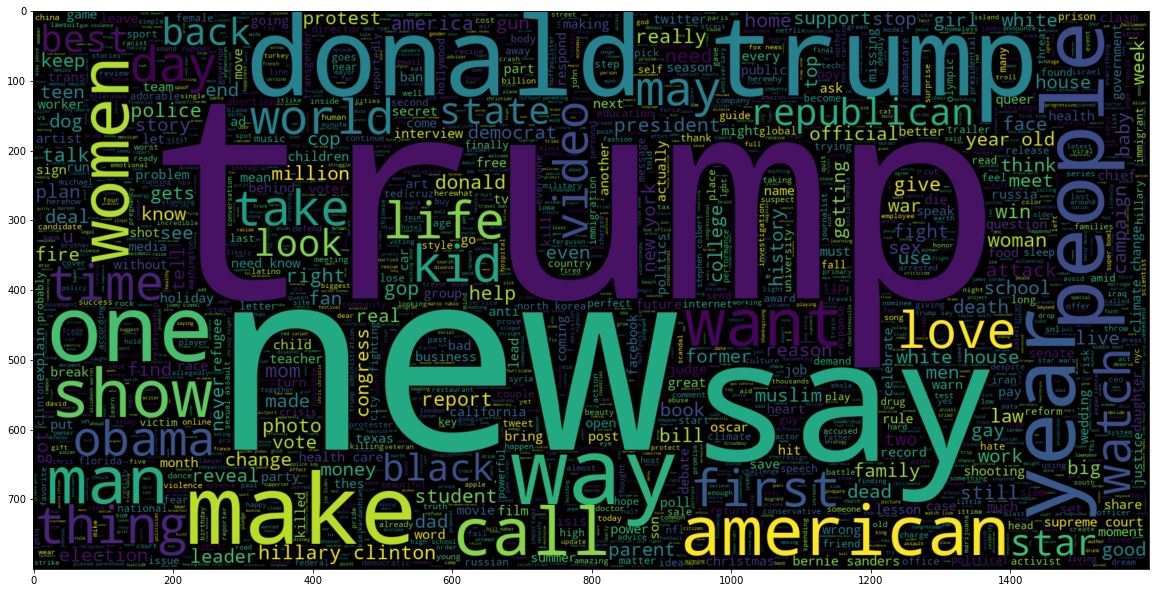

In [18]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(social_media[social_media.is_sarcastic == 0].cleaned_headline))
plt.imshow(wc , interpolation = 'bilinear');

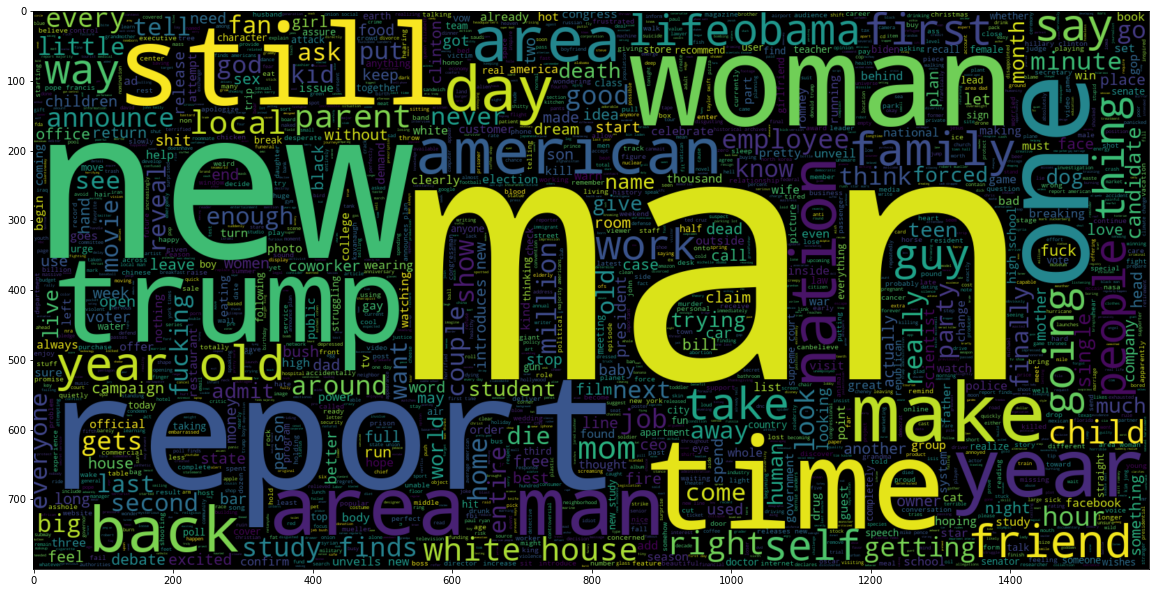

In [19]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(social_media[social_media.is_sarcastic == 1].cleaned_headline))
plt.imshow(wc , interpolation = 'bilinear');

In [50]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Bidirectional, LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [21]:
X = social_media['cleaned_headline']
y = social_media['is_sarcastic']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

**Parameters for Model and Embedding**

In [23]:
vocab_size = 4000
embedding_dim = 20
max_features = 25000
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

**Tokenizing & Padding**

In [38]:
tokenzr = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenzr.fit_on_texts(X_train)

In [39]:
X_train_tokenzr = tokenzr.texts_to_sequences(X_train)
X_test_tokenzr = tokenzr.texts_to_sequences(X_test)

In [40]:
X_train_pad = sequence.pad_sequences(X_train_tokenzr, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test_pad = sequence.pad_sequences(X_test_tokenzr, maxlen=max_length, padding=padding_type, truncating=trunc_type)

**GLoVe Encodings**

In [28]:
glove_file = open('DataSet - glove.6B.50d.txt', encoding='utf8')

In [29]:
def coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')

In [30]:
embed_index = dict(coefs(*o.rstrip().rsplit(' ')) for o in glove_file)

In [31]:
embs = np.stack(embed_index.values())
emb_mean, emb_std = embs.mean(), embs.std()
embed_size = embs.shape[1]

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [32]:
print('Mean -', emb_mean, ', Standard Deviation -', emb_std, ', Shape -', embed_size)

Mean - 0.020940498 , Standard Deviation - 0.6441043 , Shape - 50


In [33]:
word_index = tokenzr.word_index 
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embed_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

**Training GLoVe Model with LSTM**

In [45]:
model = Sequential()

model.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=300, trainable=True))

model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 50)           1250000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               183296    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 1,433,553
Trainable params: 1,433,553
Non-trainable params: 0
_________________________________________________________________


In [51]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
rlrp=ReduceLROnPlateau(monitor='val_loss', patience=2,factor=0.01, min_lr=0.00001)

In [53]:
final_model = model.fit(X_train_pad, y_train, batch_size = 500, validation_data = (X_test_pad,y_test) , epochs = 5, verbose=1, callbacks=[early_stopping,rlrp])

Epoch 1/5
46/46 [==============================] - 472s 10s/step - loss: 0.4342 - acc: 0.7936 - val_loss: 0.4342 - val_acc: 0.7914
Epoch 2/5
46/46 [==============================] - 489s 11s/step - loss: 0.3656 - acc: 0.8327 - val_loss: 0.4113 - val_acc: 0.8031
Epoch 3/5
46/46 [==============================] - 515s 11s/step - loss: 0.3259 - acc: 0.8544 - val_loss: 0.4258 - val_acc: 0.8059
Epoch 4/5
46/46 [==============================] - 534s 12s/step - loss: 0.2933 - acc: 0.8699 - val_loss: 0.4410 - val_acc: 0.8087


**Training GLoVe Model with LSTM - with few additional parameters**

In [70]:
model2 = Sequential()
model2.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=300, trainable=True))
model2.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.5 , dropout = 0.3)))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [71]:
final_model2 = model2.fit(X_train_pad, y_train, batch_size = 500, validation_data = (X_test_pad,y_test) , epochs = 5, verbose=1, callbacks=[early_stopping,rlrp])

Epoch 1/5
46/46 [==============================] - 481s 10s/step - loss: 0.5786 - acc: 0.6788 - val_loss: 0.4591 - val_acc: 0.7769
Epoch 2/5
46/46 [==============================] - 481s 10s/step - loss: 0.4112 - acc: 0.8123 - val_loss: 0.4335 - val_acc: 0.7904
Epoch 3/5
46/46 [==============================] - 520s 11s/step - loss: 0.3430 - acc: 0.8455 - val_loss: 0.4190 - val_acc: 0.8024
Epoch 4/5
46/46 [==============================] - 504s 11s/step - loss: 0.2980 - acc: 0.8695 - val_loss: 0.4447 - val_acc: 0.7968
Epoch 5/5
46/46 [==============================] - 495s 11s/step - loss: 0.2695 - acc: 0.8847 - val_loss: 0.4542 - val_acc: 0.8096


**Inference** 

- Few additional layers added in 2 model
- Both the model are with the same accuracy
- Further analysing with classification report

**Prediction & Classification Report**

In [62]:
predict_model1 = model.predict_classes(X_test_pad)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [63]:
predict_model1 = predict_model1[:, 0]

In [64]:
print(classification_report(y_test, predict_model1, target_names=['Sarcastic','Not Sarcastic']))

               precision    recall  f1-score   support

    Sarcastic       0.80      0.84      0.82      2995
Not Sarcastic       0.81      0.77      0.79      2729

     accuracy                           0.80      5724
    macro avg       0.80      0.80      0.80      5724
 weighted avg       0.80      0.80      0.80      5724



In [72]:
predict_model2 = model2.predict_classes(X_test_pad)

In [73]:
predict_model2 = predict_model2[:, 0]

In [74]:
print(classification_report(y_test, predict_model1, target_names=['Sarcastic','Not Sarcastic']))

               precision    recall  f1-score   support

    Sarcastic       0.80      0.84      0.82      2995
Not Sarcastic       0.81      0.77      0.79      2729

     accuracy                           0.80      5724
    macro avg       0.80      0.80      0.80      5724
 weighted avg       0.80      0.80      0.80      5724



**Plotting Accuracy & Loss graph for test and train data**

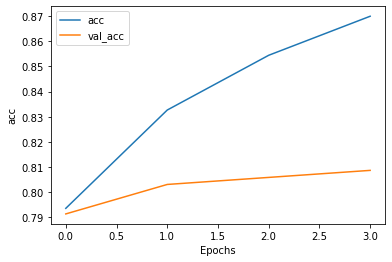

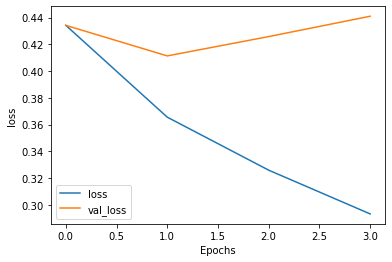

In [76]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(final_model, "acc")
plot_graphs(final_model, "loss")

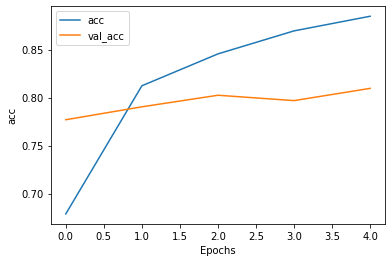

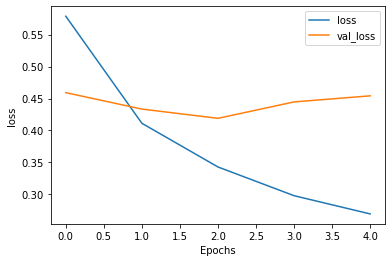

In [77]:
plot_graphs(final_model2, "acc")
plot_graphs(final_model2, "loss")

# **Conclusion**

- Loaded the JSON and GLoVe Embedding file
- For analysis few additional columns was created using existing coulmns and also delted columns which will not make sense
- Data cleaning was performed by removing space, special charcters and stop words
- Implemented Tokenisation, Padding and GLove Embedding
- Model was trained with GLoVe Embedding parameters with LSTM 
- Predicted and Accuracy with F1, recll and precision were calculated
- Finally plotted the graph for accuracy and loss.